# <span style="color:red; text-decoration:underline;">Exercise 2</span>

In [2]:
# Imports
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define constants
mu_m = 0.9 #h-1
K_S = 0.21#g.L-1
K_I = 1.5#g.L-1
Y_XS = 0.6
K_CL = 0.2#mg.L-1
Y_OS = 160#mg.g-1
M = 0.0314
V_L = 90 #L
G = 5000 #L.h-1
epsilon = 0.2
CL_I = 6 #mg.L-1
CG_I = 250 #mg.L-1
S_I = 30#g.L-1

# Initial conditions
condi_inis = [1, 0, 6, 250]

# Volume of gas phase
V_G = epsilon * V_L

In [4]:
# System of ODEs
def syst(t, variables):
    X, S, CL, CG = variables
    mu = (mu_m * S * CL) / ((K_S + S + (S**2 / K_I)) * (K_CL + CL))
    CLstar = M * CG

    dXdt = -(F / V_L) * X + mu * X
    dSdt = (F / V_L) * (S_I - S) - (mu * X) / Y_XS
    dCLdt = (F / V_L) * (CL_I - CL) - (mu * X * Y_OS) / Y_XS + K_La * (CLstar - CL)
    dCGdt = (G / V_G) * (CG_I - CG) - K_La * (CLstar - CL) * (V_L / V_G)

    return [dXdt, dSdt, dCLdt, dCGdt]

In [5]:
# Function to calculate the oxygen uptake rate (OUR)
def OUR(vars2):
    X, S, CL = vars2
    mu = (mu_m * S * CL) / ((K_S + S + (S**2 / K_I)) * (K_CL + CL))
    our = (Y_OS * mu * X * V_L) / Y_XS
    return our

## <span style="color:blue; text-decoration:underline;">Question a)</span>

In [6]:
# Time span for integration
t_span = (0, 75)

# Vary the feed volume flux
Ff = [6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10] #L.h-1
K_Laa = np.linspace(15, 17, 201) #h-1

In [7]:
# Loop through feed volume flux (Ff) and oxygen transfer coefficient (K_Laa) to find K_La allowing to avoid O2 limitation
for F in Ff:
    for K_La in K_Laa:
        resultats = solve_ivp(syst, t_span, condi_inis, method='BDF', rtol=1e-6, atol=1e-6)
        X, S, CL, CG = resultats.y
        t = resultats.t
        minCL = np.min(CL)
        
        if minCL > 3 * K_CL:
            print(f"To avoid oxygen limitation for a feed volume flux of: {F} L.h⁻¹, the required K_La is: {K_La} h⁻¹")
            break

To avoid oxygen limitation for a feed volume flux of: 6.5 L.h⁻¹, the required K_La is: 16.39 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 7 L.h⁻¹, the required K_La is: 16.02 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 7.5 L.h⁻¹, the required K_La is: 15.76 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 8 L.h⁻¹, the required K_La is: 15.57 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 8.5 L.h⁻¹, the required K_La is: 15.41 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 9 L.h⁻¹, the required K_La is: 15.29 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 9.5 L.h⁻¹, the required K_La is: 15.18 h⁻¹
To avoid oxygen limitation for a feed volume flux of: 10 L.h⁻¹, the required K_La is: 15.09 h⁻¹


In [8]:
# Set graphical parameters
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

In [9]:
# Plotting the growth rate vs. substrate concentration for feed flux of 10 L/h
F = 10 # Feed flux of 10 L/h
K_La = 15.09  # To avoid oxygen limitation, we use the K_La value we previously found for F = 10 L/h

In [10]:
# Solve the system of differential equations over the time span with given initial conditions
resultats = solve_ivp(syst, t_span, condi_inis, method='BDF', rtol=1e-6, atol=1e-6)
X, S, CL, CG = resultats.y
t = resultats.t

In [11]:
# Calculate the specific growth rate (mu) based on the Monod equation modified for substrate and oxygen limitations
mu = (mu_m * S * CL) / ((K_S + S + (S**2 / K_I)) * (K_CL + CL))

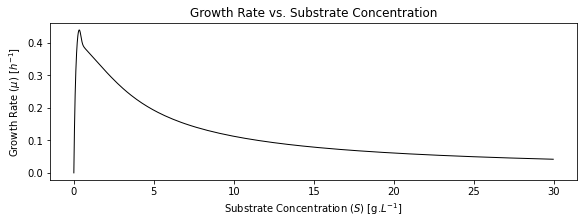

In [12]:
# Plot the figure
plt.plot(S, mu, color='black', linestyle='-')
plt.xlabel(r'Substrate Concentration ($S$) [g.$L^{-1}$]')
plt.ylabel(r'Growth Rate ($\mu$) [$h^{-1}$]')
plt.title('Growth Rate vs. Substrate Concentration')
plt.grid(False)

# Save & display the figure
plt.savefig('growth_rate_plot.eps', format='eps')

plt.show()

## <span style="color:blue; text-decoration:underline;">Question b)</span>

In [13]:
F=0 # We operate the system as a batch reactor
K_La=70 # We consider K_La = 70 h-1 
condi_inis=[1,30,6,250] # We set the initial substrate concentration to 30 g/L

In [14]:
# Solve the system of differential equations over the time span from 0 to 60 hours using the BDF method
t_span = (0, 60)
resultats = solve_ivp(syst, t_span, condi_inis, method='BDF', rtol=1e-6, atol=1e-6)
# Extract the results
[X,S,CL,CG]=resultats.y
t = resultats.t

In [15]:
# Calculate the oxygen uptake rate (OUR) using the extracted variables (biomass, substrate, and dissolved O2 concentrations)
vars_F=X,S,CL
OUR_r = OUR(vars_F)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


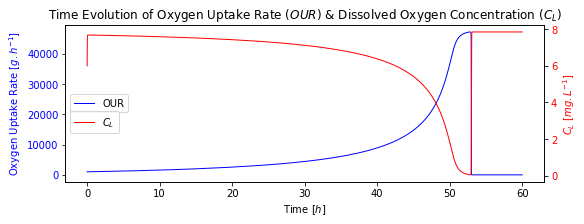

In [16]:
# Plot the first y-axis
fig, ax1 = plt.subplots(figsize=(8, 3))
ax1.plot(t, OUR_r, label="OUR", c='b', linestyle='-')
ax1.set_xlabel('Time [$h$]')
ax1.set_ylabel(r'Oxygen Uptake Rate [$g.h^{-1}$]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(t, CL, c='r',  label="$C_L$")
ax2.set_ylabel(r'$C_L$ [$mg.L^{-1}$]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends with specific bbox positions
bbox_position = (0, 0.5)

ax1.legend(fontsize=10, loc='center left', bbox_to_anchor=bbox_position)
ax2.legend(fontsize=10, loc='center left', bbox_to_anchor=(bbox_position[0], bbox_position[1] - 0.12))

plt.title(r"Time Evolution of Oxygen Uptake Rate ($OUR$) & Dissolved Oxygen Concentration ($C_L$)")
plt.xticks(rotation=45)

# Save and show the figure
plt.savefig('b1.eps', format='eps')

plt.show()

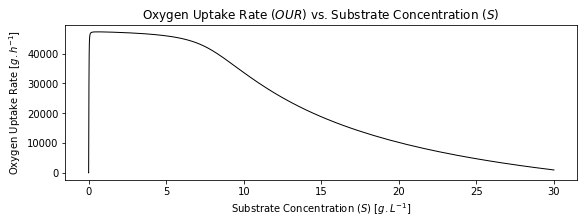

In [17]:
# Set the figure parameters
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams.update({'font.size': 10})
plt.rcParams['grid.linewidth'] = 0.25
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue'])

# Create the plot
plt.plot(S, OUR_r, linestyle='-', color='black')  # Use a solid line for the model

# Set labels
plt.ylabel(r'Oxygen Uptake Rate [$g.h^{-1}$]')
plt.xlabel(r'Substrate Concentration ($S$) [$g.L^{-1}$]')
plt.title(r"Oxygen Uptake Rate ($OUR$) vs. Substrate Concentration ($S$)")
plt.grid(False)

# Save the figure in EPS format
plt.savefig('b2.eps', format='eps')

# Display the plot
plt.show()

## <span style="color:blue; text-decoration:underline;">Question c)</span>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


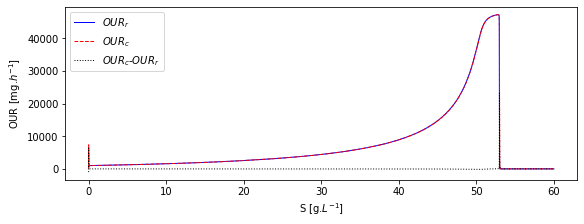

In [18]:
#computing the difference between inlet and outlet gas phase oxygen concentrations. 
deltaCG = CG_I-CG
OUR_c = G*deltaCG

#plotting the comparison with Question b)
plt.plot(t, OUR_r, c='b', label=f'$OUR_r$')
plt.plot(t, OUR_c, c='r', linestyle='--',label=f'$OUR_c$')
plt.plot(t, OUR_c-OUR_r, c='black', linestyle=':',label=f'$OUR_c$-$OUR_r$')
plt.ylabel(r'OUR [mg.$h^{-1}$]')
plt.xlabel(r'S [g.$L^{-1}$]')
plt.legend()

plt.savefig("OUR.eps" , format='eps')
plt.show()


## <span style="color:blue; text-decoration:underline;">Question d)</span>

In [19]:
#reinitiating variables to avoid problems with variable assignments
mu_m = 0.9
K_S = 0.21
K_I = 1.5
Y_XS = 0.6
K_CL = 0.2
Y_OS = 160
K_La = 70
M = 0.0314
F = 6.5 
V_L = 90
G = 5000
epsilon = 0.2
CL_I = 6
CG_I = 250


condi_inis=[1,0,6,250]

V_G = epsilon*V_L


In [20]:
#one runs the initial system twice, to account for the change in feed substrate concentrations

t_span = (0, 75)
#For Si=30 gL^-1
S_I = 30
resultats = solve_ivp(syst, t_span, condi_inis, method='BDF', rtol=1e-6, atol=1e-6)
[X_30,S_30,CL_30,CG_30]=resultats.y
t_30 = resultats.t
vars_30=X_30,S_30,CL_30
OUR_30 = OUR(vars_30) # One calls OUR to have the OUR with the concentrations retreived from the system syst. 


#For Si=100 gL^-1
S_I = 100
resultats = solve_ivp(syst, t_span, condi_inis, method='BDF', rtol=1e-6, atol=1e-6)
[X_100,S_100,CL_100,CG_100]=resultats.y
t_100 = resultats.t
vars_100=X_100,S_100,CL_100
OUR_100 = OUR(vars_100) # One calls OUR to have the OUR with the concentrations retreived from the system syst. 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


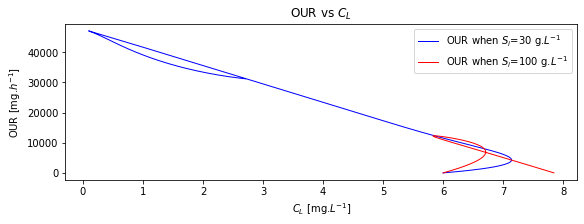

In [21]:
#first graph comparing OUR with oxygen in liquid form concentrations
plt.plot(CL_30, OUR_30, c='b', label='OUR when $S_i$=30 g.$L^{-1}$')
plt.plot(CL_100, OUR_100, c='r', label='OUR when $S_i$=100 g.$L^{-1}$')
plt.ylabel(r'OUR [mg.$h^{-1}$]')
plt.xlabel(r'$C_L$ [mg.$L^{-1}$]')
plt.legend()
plt.title("OUR vs $C_L$")
plt.savefig("OUR_CL.eps" , format='eps')

/var/folders/1w/wcv0tw_54bx1lvj8jvs24fkw0000gn/T/ipykernel_66917/116978519.py:33: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent art

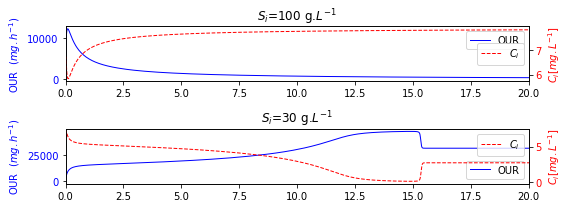

In [23]:
#second graph comparing both quantities with respect to time. 

fig, (ax1, ax2) = plt.subplots(2)

# Plotting on the first subplot
ax1.plot(t_100, OUR_100, color='b', label='OUR')
ax1.set_ylabel('OUR  $(mg.h^{-1})$', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend()
ax1.set_title("$S_i$=100 g.$L^{-1}$")
# Adding a secondary y-axis for the first subplot
ax1_secondary = ax1.twinx()
ax1_secondary.plot(t_100, CL_100, color='r', linestyle='--', label='$C_i$')
ax1_secondary.set_ylabel('$C_i [mg.L^{-1}]$', color='r')
ax1_secondary.tick_params(axis='y', labelcolor='r')
ax1_secondary.legend(loc='center right')

# Plotting on the second subplot
ax2.plot(t_30, OUR_30, color='b', label='OUR')
ax2.set_ylabel('OUR  $(mg.h^{-1})$', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc='lower right')
ax2.set_title("$S_i$=30 g.$L^{-1}$")
# Adding a secondary y-axis for the second subplot
ax2_secondary = ax2.twinx()
ax2_secondary.plot(t_30, CL_30, color='r', linestyle='--', label='$C_i$')
ax2_secondary.set_ylabel('$C_i [mg.L^{-1}]$', color='r')
ax2_secondary.tick_params(axis='y', labelcolor='r')
ax2_secondary.legend(loc='upper right')
ax1.set_xlim([0,20])
ax2.set_xlim([0,20])
# Adjust layout
plt.tight_layout()
plt.savefig("other.eps", format='eps')
# Displaying the plot
plt.show()